## Phylogenetics in R

### 1. Introduction and resources

This practical introduces you to basic phylogenetic computing in `R`. We will review importing phylogenetic trees as data files, displaying phylogenetic trees visually, and some basic evolutionary computations that can be conducted with phylogenetic trees. This practical will deliver some of the important background for Coursework 1. Below you will find some of the relevant resources required for this practical.

Parts (sections 2,3,4 and 6) of this practical are written by [Natalie Cooper](http://nhcooper123.github.io/).
The original can be found [here](https://github.com/nhcooper123/TeachingMaterials/blob/master/PhD_Museum/VisualisingPhylo.Rmd). Whereas, parts (section 5) of this practical are written by Adam Devenish (a.devenish@imperial.ac.uk)

The data used throughout the practical can be downloaded from Blackboard, Binder, or from [here](https://raw.githubusercontent.com/nhcooper123/TeachingMaterials/master/PhD_Museum/elopomorph.tre) and [here](https://raw.githubusercontent.com/nhcooper123/TeachingMaterials/master/PhD_Museum/anole.data.csv) (right click and `save link as`).



### 2. Installing and loading extra packages in R
To plot phylogenies (or use any specialized analysis) in R, you need to download one or more additional
packages from the basic R installation. For this practical you will need to install the following packages:

• ape

• phytools

To install the package ape:

In [2]:
install.packages("ape")

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



Pick the closest mirror to you. These packages will download on both Jupyter Notebooks and in your own RStudio.

You've installed the packages but they don't automatically get loaded into your `R` session. 
Instead you need to tell `R` to load them **every time** you start a new `R` session and want to use functions from these packages. 
To load the package `ape` into your current `R` session:

In [ ]:
library(ape)

You can think of `install.packages` like installing an app from the App Store on your smart phone - you only do this once - and `library` as being like pushing the app button on your phone - you do this every time you want to use the app.

Don't forget to load `phytools` too! This may take a while on Juypter Notebooks, but you only need to install it once on your own computer!

In [4]:
install.packages("phytools",repos="https://cloud.r-project.org",quiet=TRUE)


In [ ]:
library(phytools)


### 2. A refresher of phylogenetic trees

This section will review some basic aspects of phylogenetic trees and introduce how trees are handled at the level of software. Because you are now interacting with phylogenetic trees at a ‘lower level’ (i.e. at the bioinformatics level), it is also helpful to know some of the names for parts of phylogenetic trees used in computer science.

### A. Tree parameters
 
A phylogenetic tree is an ordered, multifurcating graph with labeled **tips** (or **leaves**) (and sometimes labeled histories). It represents the relative degrees of relationships of species (i.e. tips or OTUs). The graph consists of a series of **branches** (or **edges**) with join successively towards **nodes** (or **vertices**, *sing.* **vertex**). Each node is subtended by a single branch, representing the lineage of ancestors leading to a node. The node is thus the common ancestor of two or more descendant branches. All the descendant branches of a given node (and all of the their respective descendants) are said to form a **clade** (or **monophyletic group**).

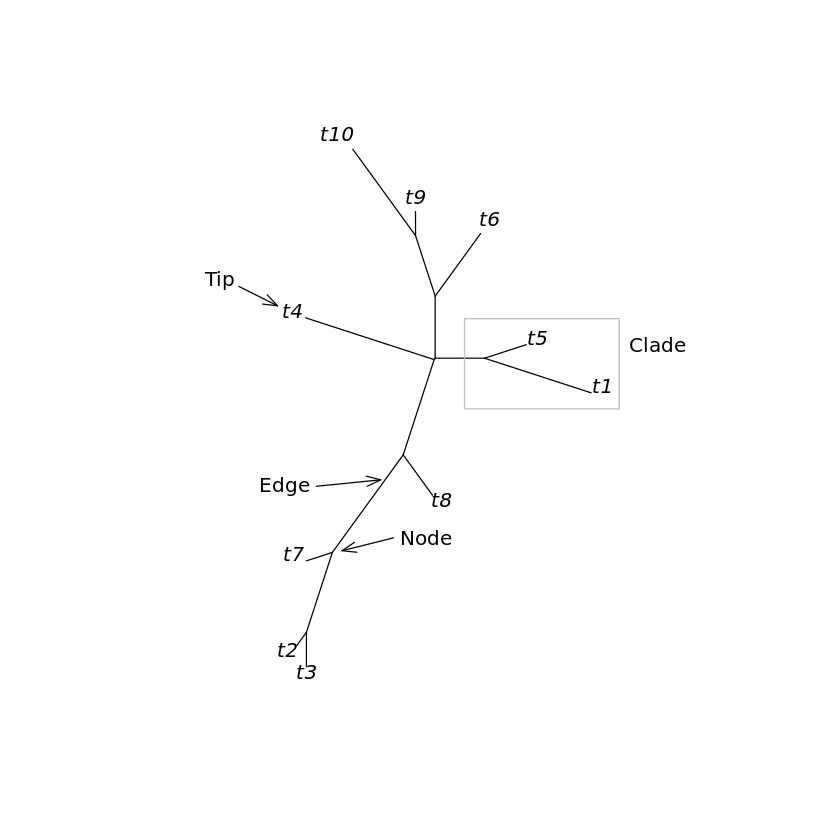

In [3]:
# rtree creates a random tree. Setting the seed means that the same 'random' tree will plotted each time. This is because random
# numbers from your computer are generated using the internal clock. Google it for more info!
set.seed(0); plot(rtree(10), "unrooted") 
## Plot clade label
rect(1.3,2.0,2.5,2.7, border = "grey")
text(2.8, 2.5, "Clade")
## Plot node label
arrows(0.35,0.9,0.75,1, length = 0.125, angle = 20, code = 1)
text(1.0, 1, "Node")
## Plot edge label
arrows(0.65,1.45,0.15,1.4, length = 0.125, angle = 20, code = 1)
text(-0.1, 1.4, "Edge")
## Plot tip label
arrows(-0.15,2.8,-0.45,2.95, length = 0.125, angle = 20, code = 1)
text(-0.6, 3, "Tip")

When we select a node to act as the base of a tree, the tree is said to be **rooted**. At the bottom of a tree, is the **root node** (or simply the **root**).

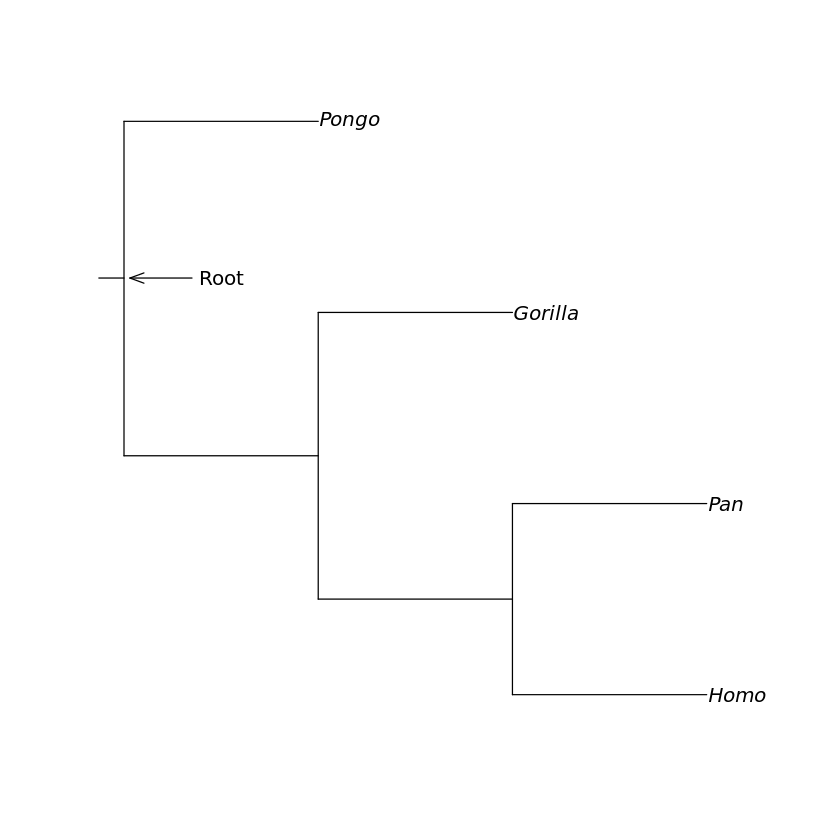

In [4]:
# You can also read in trees directly from text by specifying the branch lengths after each node/tip. More info below!
tree <- read.tree(text = "(((Homo:1, Pan:1):1, Gorilla:1):1, Pongo:1);")
plot(tree)
## Plot root label
lines(c(-0.5,0), c(3.18,3.18))
arrows(0.03,3.18,0.35,3.18, length = 0.125, angle = 20, code = 1)
text(0.5, 3.18, "Root")

Phylogenetic trees of the kind shown above are fairly simple and lack information about time or character changes occurring along a branch. We can assign branch length in the form of either time or the amount of change/substitution along a branch. A tree with **branch lengths** depicted can be called a **phylogram**.

When (an implied) dimension of time is being considered, all the tips of the tree must be at the level representing the time in which they are observed. For trees where all the species are extant, the tips are flush at the top. This representation is called an **ultrametric** tree.

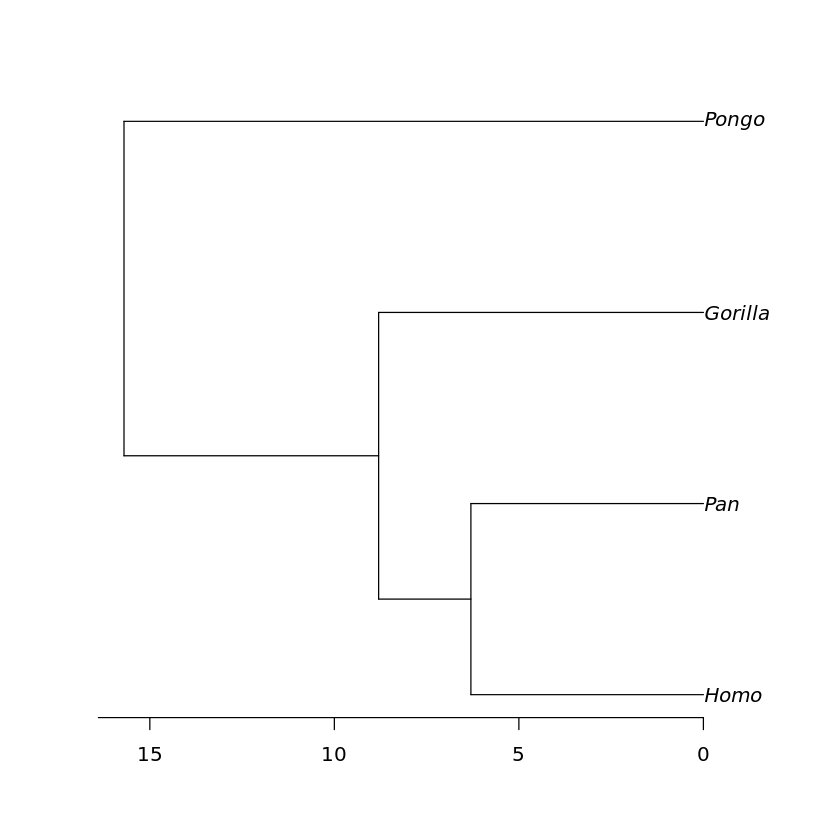

In [5]:
tree <- read.tree(text = "(((Homo:6.3, Pan:6.3):2.5, Gorilla:8.8):6.9, Pongo:15.7);")
plot(tree)
axisPhylo()

### B. Informatic representations of tree

To perform any useful calculations on a tree, we need both a computer-readable tree format and (in part) to understand how trees are constructed in computer memory.
 
#### Text based formats

Storage of trees for transfer between different software is essential. This is most commonly achieved with a text-based format stored in a file. The most common file format for representing phylogenetic trees is **Newick format**. This consists of clades represented within parentheses. Commas separate each clade. Either tip names or symbols representing the tips are nested within the lowest orders of parentheses. Each tip or branch can be associated with a branch length scalar that follows a colon.

For example:

`"(((Homo, Pan), Gorilla), Pongo);"`

Or with branch length:

`"(((Homo:6.3, Pan:6.3):2.5, Gorilla:8.8):6.9, Pongo:15.7);"`

Trees are also increasing use of XML formats such as PhyloXML and NeXML.

In this practical we are going to use the `elopomorph.tre` newick tree.
You can open it with a simple text editor to see the newick tree structure.

#### Edge table

It is also possible to represent a phylogenetic tree as a matrix of edges and vertices called an edge table. This is an even less intuitive representation, but it is implemented in `R` and worth reviewing here.

There are a number of conventions that can be used to create an edge table. The general concept consists of numbering the tips *1 - n*, and all internal nodes labeled *n+1 ... n+n-1*. The numbers for the internal nodes can be assigned arbitrarily or according to an algorithm.

In `R` packages like `ape`, edge tables are constructed as follows:

| node | connects to |
|---|---|
| 5 | 6 |
| 6 | 7 |
| 7 | 1 |
| 7 | 2 |
| 6 | 3 |
| 5 | 4 |

You read the table as follows: node `5` (root) connects to node `6`. The node `6` connects to node `7`. Node `7` connects to node `1` that happen to be the first tip (`Homo`) and to node `2` (`Pan`) etc... Note that in a binary tree (i.e. a tree where each node has only two descendants) each node always connects to two elements (nodes or tips).

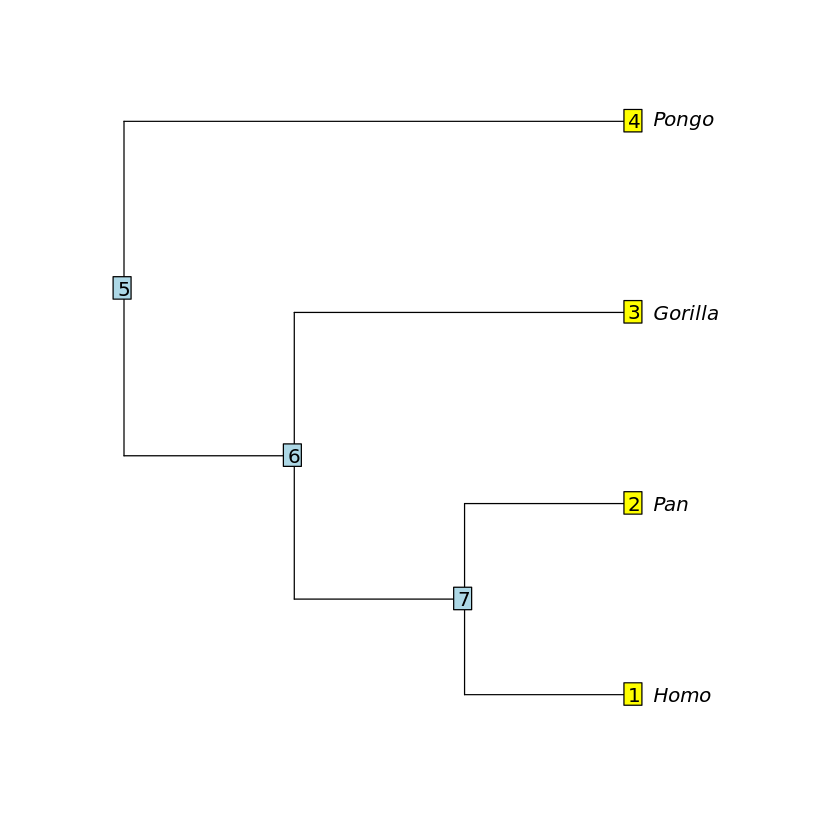

In [6]:
tree <- read.tree(text = "(((Homo, Pan), Gorilla), Pongo);")
plot(tree, label.offset = 0.1)
nodelabels() ; tiplabels()

#### Records & pointers

At a lower level, phylogenetic trees can be represented in computer memory as more complex data objects. We don’t need to go into detail here, but if you consider nodes and tips as data objects (i.e. a dataframe), a tree could be stored as an array of dataframes which store information about which store information about which members of that same array are descendants and which are ancestors.

### 3. Loading your phylogeny and data into `R`
#### Reading in a phylogeny from a file
To load a tree you need the function `read.tree`.
`read.tree` can read any newick format trees (see above) like the `elopomorph.tre` file.

In [7]:
fishtree <- read.tree("elopomorph.tre")

###### Be sure you are always in the right directory. Remember you can navigate in `R` using `setwd()`, `getwd()` and `list.files()` (to see what's in the current directory). While using this notebook all the files are stored in the main binder, so you shouldn't need to change the directory.

### Reading in a phylogeny that is already built into `R`
The bird and anole phylogenies are already built into `R` so we don't need to read them in using `read.tree`.
Instead we just use:


In [8]:
data(bird.orders)
data(anoletree)

### Reading and viewing your data in `R`
Later we will use some Greater Antillean *Anolis* lizard data to add data to a phylogeny.
Before we can add data to our tree, we need to load the data we are going to use. 
`R` can read files in lots of formats, including comma-delimited and tab-delimited files.
Excel (and many other applications) can output files in this format (it's an option in the `Save As` dialogue box under the `File` menu). 
To save time I have given you a comma-delimited text file called `anole.data.csv` which we are going to use. 
Load these data as follows. 
I am assuming you have set your working directory, if not don't forget the path.

In [9]:
anoledata <- read.csv("anole.data.csv", header = TRUE)

You can use `read.delim` for tab delimited files or `read.csv` for comma delimited files (**c**omma **s**eparated **v**alues).
`header = TRUE`, indicates that the first line of the data contains column headings.

This is a good point to note that unless you **tell** `R` you want to do something, it won't do it automatically. 
So here if you successfully entered the data, `R` won't give you any indication that it worked.
Instead you need to specifically ask `R` to look at the data.

We can look at the data by typing:

In [10]:
str(anoledata)

'data.frame':	100 obs. of  23 variables:
 $ species               : Factor w/ 100 levels "ahli","alayoni",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ AVG.SVL               : num  4.04 3.82 3.53 4.04 4.38 ...
 $ AVG.hl                : num  2.88 2.7 2.38 2.9 3.36 ...
 $ AVG.hw                : num  2.36 1.99 1.56 2.37 2.69 ...
 $ AVG.hh                : num  2.13 1.75 1.39 2.05 2.32 ...
 $ AVG.ljl               : num  2.85 2.71 2.32 2.9 3.38 ...
 $ AVG.outlever          : num  2.75 2.62 2.26 2.83 3.29 ...
 $ AVG.jugal.to.symphysis: num  2.54 2.37 2.08 2.6 3.07 ...
 $ AVG.femur             : num  2.74 2.07 2.17 2.48 2.8 ...
 $ AVG.tibia             : num  2.69 2.02 2.09 2.34 2.69 ...
 $ AVG.met               : num  2.25 1.54 1.55 1.87 2.18 ...
 $ AVG.ltoe.IV           : num  2.55 1.88 1.73 2.26 2.53 ...
 $ AVG.toe.IV.lam.width  : num  0.1795 0.0488 -0.5361 0.4904 0.8441 ...
 $ AVG.humerus           : num  2.46 1.95 1.63 2.3 2.62 ...
 $ AVG.radius            : num  2.27 1.69 1.4 2.09 2.34 ...
 $ AVG.

**Always** look at your data before beginning any analysis to check it read in correctly.

`str` shows the structure of the data frame (this can be a really useful command when you have a big data file). 
It also tells you what kind of variables `R` thinks you have (characters, integers, numeric, factors etc.). 
Some `R` functions need the data to be certain kinds of variables so it's useful to check this.

In [11]:
head(anoledata)

,species,AVG.SVL,AVG.hl,AVG.hw,AVG.hh,AVG.ljl,AVG.outlever,AVG.jugal.to.symphysis,AVG.femur,AVG.tibia,⋯,AVG.humerus,AVG.radius,AVG.lfing.IV,AVG.fing.IV.lam.width,AVG.pelv.ht,AVG.pelv.wd,Foot.Lam.num,Hand.Lam.num,Avg.lnSVL2,Avg.ln.t1
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ahli,4.039125,2.882657,2.356126,2.131599,2.854745,2.754934,2.538052,2.741378,2.686032,⋯,2.460728,2.268511,1.943288,0.07541664,1.987646,1.7095849,3.279600,2.866197,3.939015,4.406652
2,alayoni,3.815705,2.702116,1.990610,1.751588,2.708966,2.617852,2.371995,2.065121,2.016402,⋯,1.947873,1.687093,1.403029,-0.07391568,1.507128,1.4194873,3.432372,3.075269,3.743863,4.002788
3,alfaroi,3.526655,2.378156,1.556037,1.390037,2.323857,2.263844,2.077565,2.172476,2.094946,⋯,1.628260,1.401183,1.040277,-0.75502258,1.189367,0.9458495,3.198016,2.733866,3.478776,4.369448
4,aliniger,4.036557,2.898836,2.366592,2.046660,2.903946,2.828555,2.596821,2.475445,2.344015,⋯,2.298878,2.091864,1.702199,0.31554040,1.867949,1.7521520,3.582875,3.156774,3.933181,4.441203
5,allisoni,4.375390,3.358957,2.690339,2.317309,3.381306,3.288402,3.071149,2.795145,2.687734,⋯,2.618551,2.341565,1.983412,0.65838319,2.097302,2.0142361,3.721185,3.239211,4.355582,5.039851
6,allogus,4.040138,2.861027,2.351275,2.142107,2.848331,2.750404,2.539320,2.739175,2.684476,⋯,2.459994,2.267176,1.919010,0.05329130,2.008426,1.6875679,3.335990,2.808270,4.028863,4.510920


This gives you the first few rows of data along with the column headings.

In [12]:
names(anoledata)

[1] "species"                "AVG.SVL"                "AVG.hl"                
 [4] "AVG.hw"                 "AVG.hh"                 "AVG.ljl"               
 [7] "AVG.outlever"           "AVG.jugal.to.symphysis" "AVG.femur"             
[10] "AVG.tibia"              "AVG.met"                "AVG.ltoe.IV"           
[13] "AVG.toe.IV.lam.width"   "AVG.humerus"            "AVG.radius"            
[16] "AVG.lfing.IV"           "AVG.fing.IV.lam.width"  "AVG.pelv.ht"           
[19] "AVG.pelv.wd"            "Foot.Lam.num"           "Hand.Lam.num"          
[22] "Avg.lnSVL2"             "Avg.ln.t1"

This gives you the names of the columns.

In [13]:
anoledata

species,AVG.SVL,AVG.hl,AVG.hw,AVG.hh,AVG.ljl,AVG.outlever,AVG.jugal.to.symphysis,AVG.femur,AVG.tibia,⋯,AVG.humerus,AVG.radius,AVG.lfing.IV,AVG.fing.IV.lam.width,AVG.pelv.ht,AVG.pelv.wd,Foot.Lam.num,Hand.Lam.num,Avg.lnSVL2,Avg.ln.t1
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ahli,4.039125,2.882657,2.356126,2.131599,2.854745,2.754934,2.538052,2.741378,2.686032,⋯,2.460728,2.268511,1.943288,0.07541664,1.987646,1.7095849,3.279600,2.866197,3.939015,4.406652
alayoni,3.815705,2.702116,1.990610,1.751588,2.708966,2.617852,2.371995,2.065121,2.016402,⋯,1.947873,1.687093,1.403029,-0.07391568,1.507128,1.4194873,3.432372,3.075269,3.743863,4.002788
alfaroi,3.526655,2.378156,1.556037,1.390037,2.323857,2.263844,2.077565,2.172476,2.094946,⋯,1.628260,1.401183,1.040277,-0.75502258,1.189367,0.9458495,3.198016,2.733866,3.478776,4.369448
aliniger,4.036557,2.898836,2.366592,2.046660,2.903946,2.828555,2.596821,2.475445,2.344015,⋯,2.298878,2.091864,1.702199,0.31554040,1.867949,1.7521520,3.582875,3.156774,3.933181,4.441203
allisoni,4.375390,3.358957,2.690339,2.317309,3.381306,3.288402,3.071149,2.795145,2.687734,⋯,2.618551,2.341565,1.983412,0.65838319,2.097302,2.0142361,3.721185,3.239211,4.355582,5.039851
allogus,4.040138,2.861027,2.351275,2.142107,2.848331,2.750404,2.539320,2.739175,2.684476,⋯,2.459994,2.267176,1.919010,0.05329130,2.008426,1.6875679,3.335990,2.808270,4.028863,4.510920
altitudinalis,3.842994,2.852728,2.192770,1.949119,2.833213,2.753820,2.561482,2.109000,2.002493,⋯,2.055085,1.830179,1.349371,-0.00250313,1.735189,1.5454326,3.511434,3.198465,3.868386,4.192315
alumina,3.588941,2.417825,1.610295,1.455621,2.392034,2.304441,2.104483,2.230629,2.182836,⋯,1.772771,1.568021,1.179973,-0.64299740,1.232144,1.0336927,3.364413,2.694252,3.589352,4.667160
alutaceus,3.554891,2.434052,1.657275,1.512486,2.400528,2.316291,2.132271,2.151530,2.118061,⋯,1.690834,1.511825,1.133336,-0.45570633,1.216099,0.9738046,3.331201,2.782455,3.549917,4.549890


This will print out all of the data!

### 4. Basic tree viewing in `R`
Now let's visualise some phylogenies! We'll use the Elopomorpha (eels and similar fishes) tree to start as it is simple.

In [14]:
fishtree <- read.tree("elopomorph.tre")

Let's examine the tree by typing:

In [15]:
fishtree
str(fishtree)


Phylogenetic tree with 62 tips and 61 internal nodes.

Tip labels:
  Moringua_edwardsi, Kaupichthys_nuchalis, Gorgasia_taiwanensis, Heteroconger_hassi, Venefica_proboscidea, Anguilla_rostrata, ...

Rooted; includes branch lengths.

List of 4
 $ edge       : int [1:122, 1:2] 63 64 64 65 66 67 68 68 69 70 ...
 $ edge.length: num [1:122] 0.0105 0.0672 0.00537 0.00789 0.00157 ...
 $ Nnode      : int 61
 $ tip.label  : chr [1:62] "Moringua_edwardsi" "Kaupichthys_nuchalis" "Gorgasia_taiwanensis" "Heteroconger_hassi" ...
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "cladewise"


`fishtree` is a fully resolved tree with branch lengths. 
There are 62 species and 61 internal nodes. 
We can plot the tree by using the `plot.phylo` function of `ape`. 
Note that we can just use the function `plot` to do this as `R` knows if we ask it to plot a phylogeny to use `plot.phylo` instead!

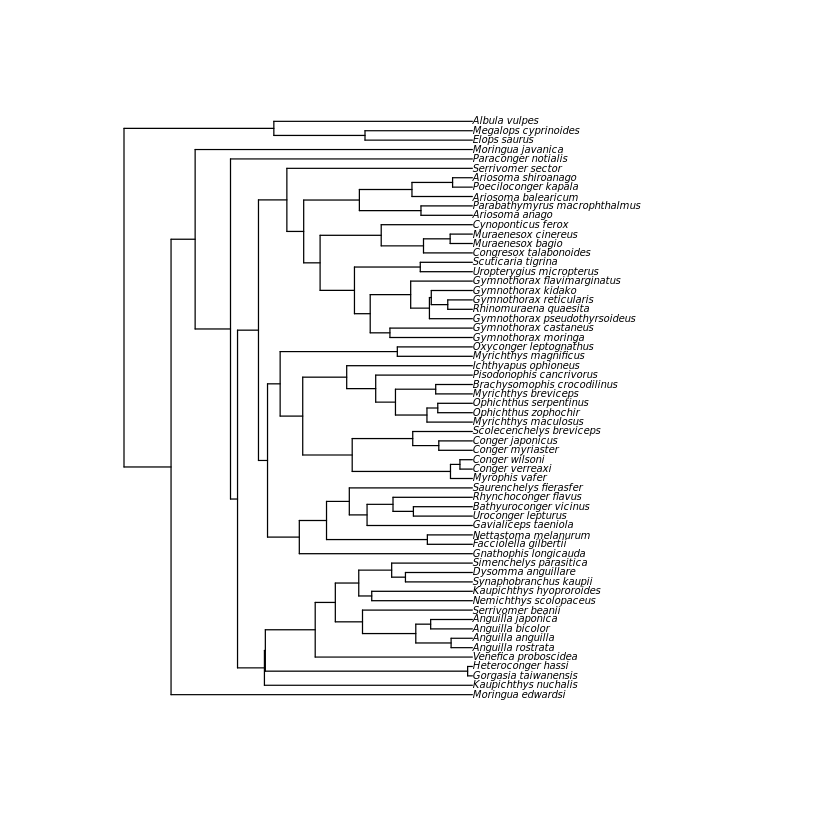

In [16]:
plot(fishtree, cex = 0.5)

`cex = 0.5` reduces the size of the tip labels so we can read them. 

We can also zoom into different sections of the tree that you're interested in:

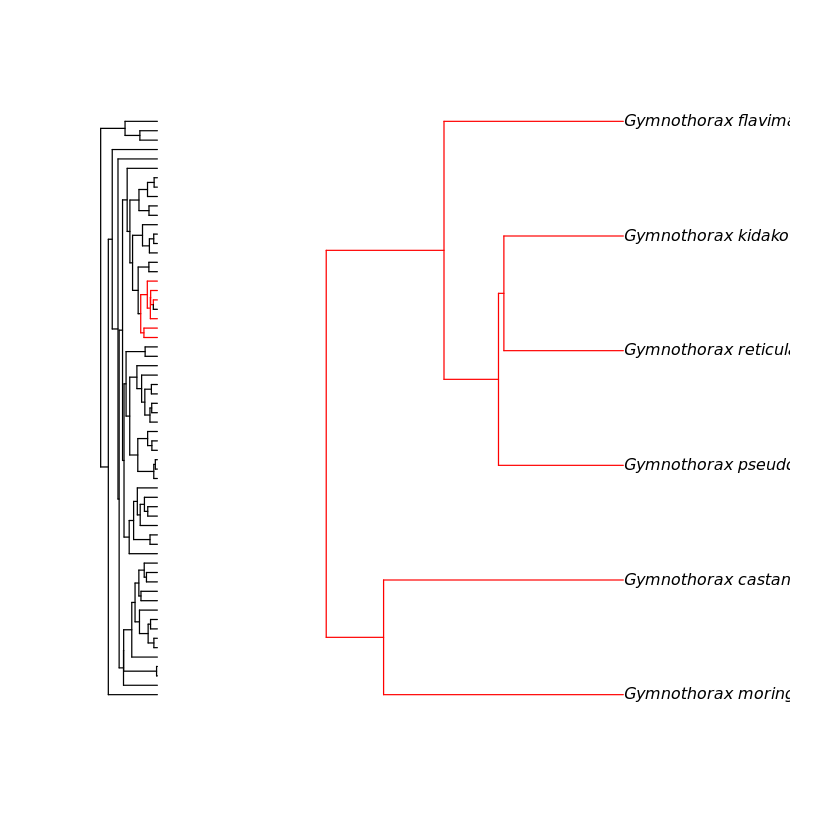

In [17]:
zoom(fishtree, grep("Gymnothorax", fishtree$tip.label), subtree = FALSE, cex = 0.8)

The `grep` function is a generic function in `R` that allows to *grab* any element in an object containing the desired characters.
In this example, `grep` is going to search for all the elements in `fishtree$tip.label` that contains `Gymnothorax` (e.g. `Gymnothorax_kidako`, `Gymnothorax_reticularis`).
Try using only `grep("thorax", fishtree$tip.label)` to see if it also only selects the members of the *Gymnothorax* genus.

In this example, we just display the tree for the *Gymnothorax* genus but you can also see how the species fit into the rest of the tree using:


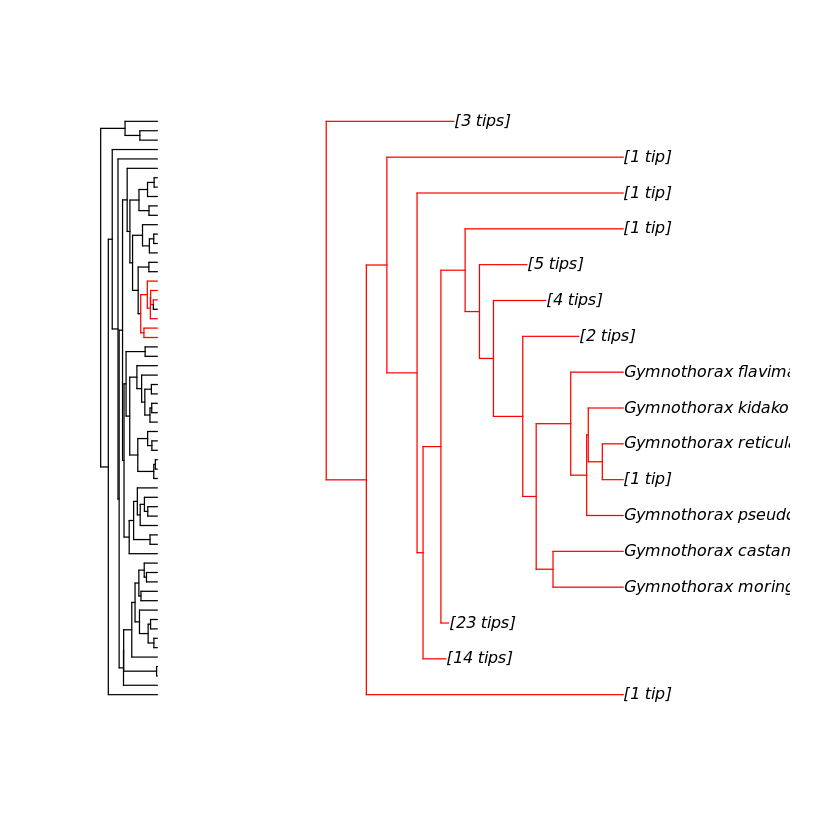

In [18]:
zoom(fishtree, grep("Gymnothorax", fishtree$tip.label), subtree = TRUE, cex = 0.8)

###### Note that `zoom` is a specific plotting function that will automatically set the plotting window to display two plots at once. This might create some conflicts if you're using RStudio. The bug can be easily solved though by typing `dev.off()` to reinitialise the plotting window and then proceed to the normal `zoom(...)` function as written above.

You can also reset this to one plot only per window by using:


In [19]:
par(mfrow = c(1, 1))

To get further options for the plotting of phylogenies:

In [20]:
?plot.phylo

Using the question mark (`?`) can also be done for every function if you want more details!

Note that although you can use `plot` to plot the phylogeny, you need to specify `plot.phylo` to find out the options for plotting trees. You can change the style of the tree (`type`), the color of the branches and tips (`edge.color`, `tip.color`), and the size of the tip labels (`cex`). 
Here's an fun/hideous example! 


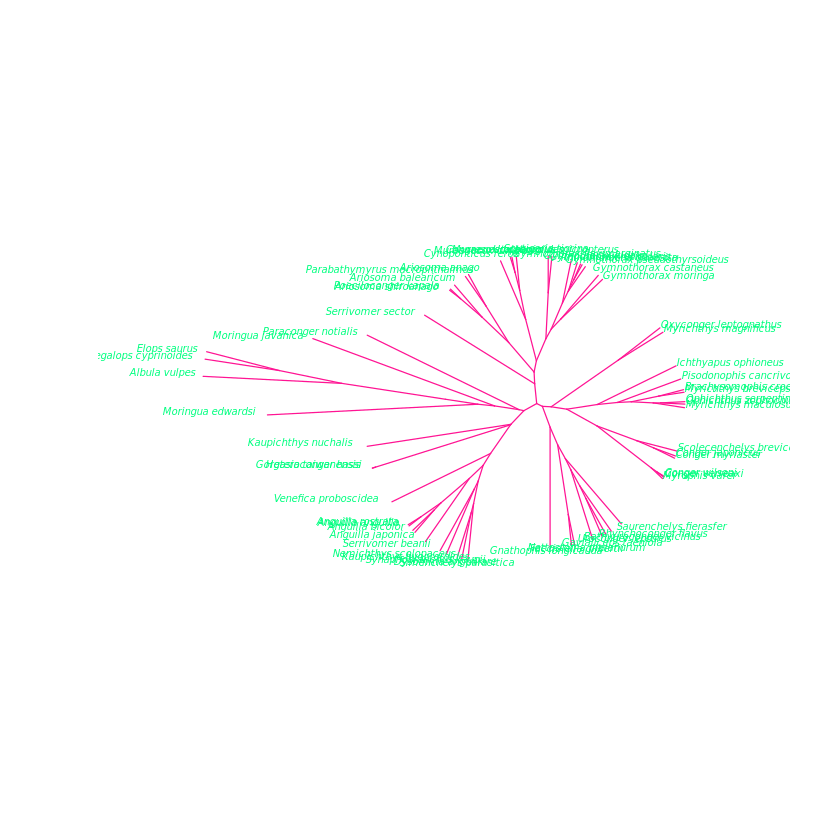

In [21]:
plot(fishtree, type = "unrooted", edge.color = "deeppink", tip.color = "springgreen",  cex = 0.5)

Or try

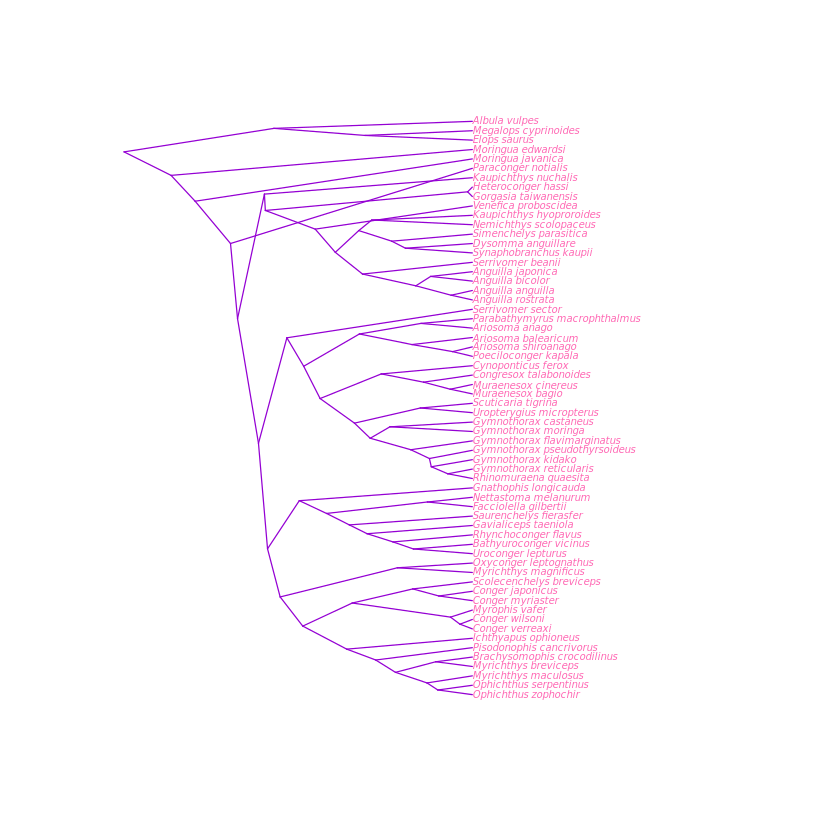

In [22]:
plot(ladderize(fishtree), type = "c", edge.color = "darkviolet", tip.color = "hotpink",  cex = 0.5)

The `ladderize` function allows to display the branches from shortest to longest.

> Try to modify the graphical options (colors, display, size, ordering of the nodes, etc.) to obtain the most beautiful or ugliest Elopomorpha phylogeny!

## 5. Manipulating phylogenetic trees in `R`

There are a range of ways in which we can manipulate trees in R. To start lets take a look at the bird family Turdidae.

In [23]:
Turdidae_tree<-read.nexus("Turdidae_birdtree.nex")

As this multiphylo object (i.e. contains 100 different trees) we need to first choose one random tree before we start.

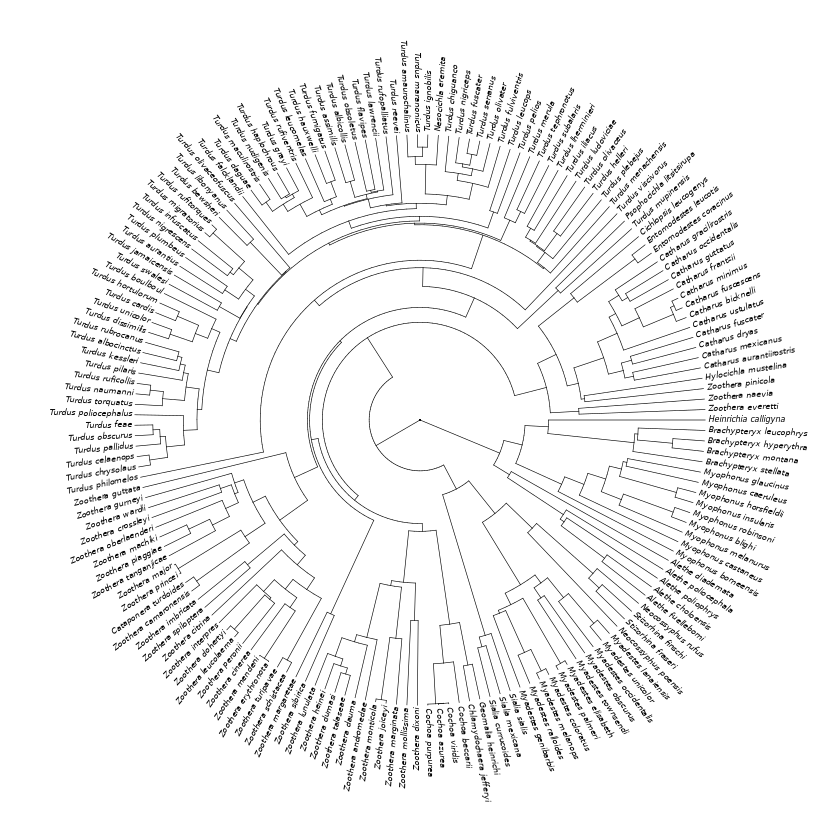

In [24]:
Ran_Turdidae_tree <-sample(Turdidae_tree,size=1)[[1]]
plotTree(Ran_Turdidae_tree,type="fan",fsize=0.4,lwd=0.5,ftype="i")

First, lets see what species are in the tree.

In [25]:
Ran_Turdidae_tree$tip.label

[1] "Zoothera_everetti"         "Zoothera_naevia"          
  [3] "Zoothera_pinicola"         "Hylocichla_mustelina"     
  [5] "Catharus_aurantiirostris"  "Catharus_mexicanus"       
  [7] "Catharus_dryas"            "Catharus_fuscater"        
  [9] "Catharus_ustulatus"        "Catharus_bicknelli"       
 [11] "Catharus_fuscescens"       "Catharus_minimus"         
 [13] "Catharus_frantzii"         "Catharus_guttatus"        
 [15] "Catharus_occidentalis"     "Catharus_gracilirostris"  
 [17] "Entomodestes_coracinus"    "Entomodestes_leucotis"    
 [19] "Cichlopsis_leucogenys"     "Turdus_mupinensis"        
 [21] "Psophocichla_litsitsirupa" "Turdus_viscivorus"        
 [23] "Turdus_menachensis"        "Turdus_plebejus"          
 [25] "Turdus_helleri"            "Turdus_olivaceus"         
 [27] "Turdus_ludoviciae"         "Turdus_iliacus"           
 [29] "Turdus_lherminieri"        "Turdus_subalaris"         
 [31] "Turdus_tephronotus"        "Turdus_merula"            
 [33] "Turdus_pelios"             "Turdus_leucops"           
 [35] "Turdus_fulviventris"       "Turdus_olivater"          
 [37] "Turdus_serranus"           "Turdus_fuscater"          
 [39] "Turdus_nigriceps"          "Turdus_chiguanco"         
 [41] "Nesocichla_eremita"        "Turdus_ignobilis"         
 [43] "Turdus_maranonicus"        "Turdus_amaurochalinus"    
 [45] "Turdus_reevei"             "Turdus_rufopalliatus"     
 [47] "Turdus_lawrencii"          "Turdus_flavipes"          
 [49] "Turdus_obsoletus"          "Turdus_albicollis"        
 [51] "Turdus_assimilis"          "Turdus_fumigatus"         
 [53] "Turdus_hauxwelli"          "Turdus_leucomelas"        
 [55] "Turdus_rufiventris"        "Turdus_grayi"             
 [57] "Turdus_haplochrous"        "Turdus_nudigenis"         
 [59] "Turdus_maculirostris"      "Turdus_daguae"            
 [61] "Turdus_falcklandii"        "Turdus_olivaceofuscus"    
 [63] "Turdus_libonyanus"         "Turdus_bewsheri"          
 [65] "Turdus_rufitorques"        "Turdus_migratorius"       
 [67] "Turdus_infuscatus"         "Turdus_nigrescens"        
 [69] "Turdus_plumbeus"           "Turdus_aurantius"         
 [71] "Turdus_jamaicensis"        "Turdus_swalesi"           
 [73] "Turdus_boulboul"           "Turdus_hortulorum"        
 [75] "Turdus_cardis"             "Turdus_unicolor"          
 [77] "Turdus_dissimilis"         "Turdus_rubrocanus"        
 [79] "Turdus_albocinctus"        "Turdus_kessleri"          
 [81] "Turdus_pilaris"            "Turdus_ruficollis"        
 [83] "Turdus_naumanni"           "Turdus_torquatus"         
 [85] "Turdus_poliocephalus"      "Turdus_feae"              
 [87] "Turdus_obscurus"           "Turdus_pallidus"          
 [89] "Turdus_celaenops"          "Turdus_chrysolaus"        
 [91] "Turdus_philomelos"         "Zoothera_guttata"         
 [93] "Zoothera_gurneyi"          "Zoothera_wardii"          
 [95] "Zoothera_crossleyi"        "Zoothera_oberlaenderi"    
 [97] "Zoothera_machiki"          "Zoothera_piaggiae"        
 [99] "Zoothera_tanganjicae"      "Zoothera_major"           
[101] "Zoothera_princei"          "Cataponera_turdoides"     
[103] "Zoothera_camaronensis"     "Zoothera_imbricata"       
[105] "Zoothera_spiloptera"       "Zoothera_citrina"         
[107] "Zoothera_interpres"        "Zoothera_dohertyi"        
[109] "Zoothera_leucolaema"       "Zoothera_peronii"         
[111] "Zoothera_cinerea"          "Zoothera_mendeni"         
[113] "Zoothera_erythronota"      "Zoothera_turipavae"       
[115] "Zoothera_schistacea"       "Zoothera_margaretae"      
[117] "Zoothera_sibirica"         "Zoothera_lunulata"        
[119] "Zoothera_heinei"           "Zoothera_dumasi"          
[121] "Zoothera_talaseae"         "Zoothera_dauma"           
[123] "Zoothera_andromedae"       "Zoothera_monticola"       
[125] "Zoothera_joiceyi"          "Zoothera_marginata"       
[127] "Zoothera_mollissima"       "Zoothera_dixoni"          
[129] "Cochoa_purpurea"           

Lets say we want to drop all species with the Myadestes genus. In this instance we first find all the associated tip.labels. 

In [26]:
drop.species<-("Myadestes")
# sapply is a function that will iterate a given function over a vector (check out apply, lapply, mapply for more info)
# in this case, we're using the grep function to find the index of anything in tip.labels that matches drop.species
selected.tips<-sapply(drop.species,grep,Ran_Turdidae_tree$tip.label)
# We then use the indices to select only the tips we want from all the available tip labels
drop.species<-Ran_Turdidae_tree$tip.label[selected.tips]
drop.species

[1] "Myadestes_genibarbis"   "Myadestes_ralloides"    "Myadestes_melanops"    
 [4] "Myadestes_coloratus"    "Myadestes_palmeri"      "Myadestes_elisabeth"   
 [7] "Myadestes_townsendi"    "Myadestes_obscurus"     "Myadestes_occidentalis"
[10] "Myadestes_unicolor"     "Myadestes_lanaiensis"

Now, we create a new tree, with the Myadestes tips dropped from it.

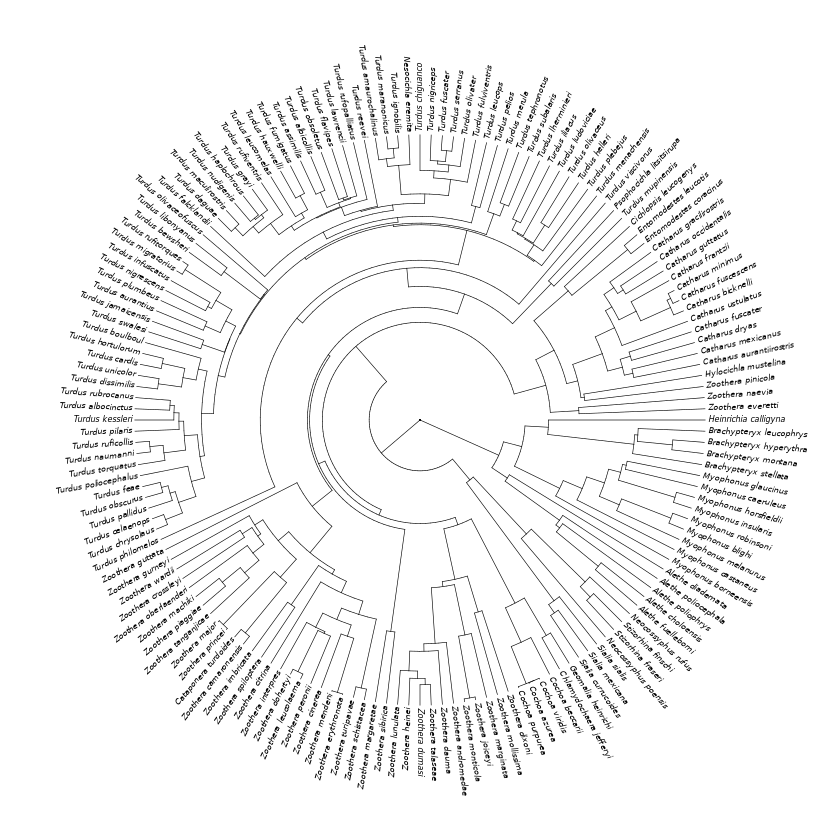

In [27]:
# drop.tip will remove any matching tips from the tree
Ran_Turdidae_tree_NM<-drop.tip(Ran_Turdidae_tree,drop.species)
plotTree(Ran_Turdidae_tree_NM,type="fan",fsize=0.4,lwd=0.5,ftype="i")

Alternatively, lets say we want to extract the clade within the tree that includes the pre identified selected range of species.

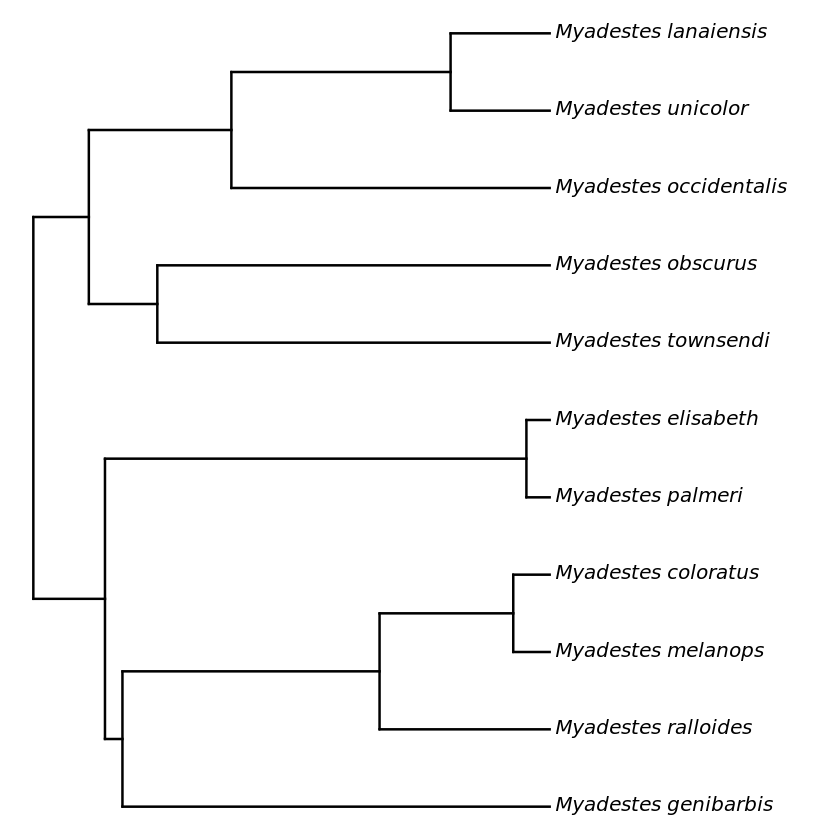

In [28]:
# Set diff will find all the tips that don't match drop.species, and then drop.tip will remove them
pruned_birdtree<-drop.tip(Ran_Turdidae_tree,
    setdiff(Ran_Turdidae_tree$tip.label,drop.species))
plotTree(pruned_birdtree,ftype="i")

**Remember, always to save your new revised tree. As this will save you time from having to prune it everytime. Use `write.tree` or `write.nexus` the same as you would to save a dataframe**

For some analyses, you might want to work with on a genus level tree. This can easily be done by a few key steps. We can do this using base `R`, but we'll use some packages from the `tidyverse` that have some very useful functions. 
First install and load `stringr` (for manipulating strings) and `dplyr` (for manipulating dataframes). 

In [29]:
install.packages(c('stringr', 'dplyr'))
library(stringr)
library(dplyr)

Installing packages into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [30]:
# Copy a list of all the tips from the tree
bird_tips <- Ran_Turdidae_tree$tip.label

# Split the labels into two strings where there's an underscore (simplfy returns the splits as separate columns in a dataframe)
bird_genera <- bird_tips %>% str_split(pattern = "_", simplify= TRUE)
colnames(bird_genera) <- c("Genus", "Species")

# Pull out the rows that have an distinct genus name. This will be the first instance in the dataframe for that genus.
bird_genera <- as.data.frame(bird_genera) %>% distinct(Genus, .keep_all = T)
bird_genera

Genus,Species
<fct>,<fct>
Zoothera,everetti
Hylocichla,mustelina
Catharus,aurantiirostris
Entomodestes,coracinus
Cichlopsis,leucogenys
Turdus,mupinensis
Psophocichla,litsitsirupa
Nesocichla,eremita
Cataponera,turdoides


We now have a dataframe of species, with one tip per each unique genus. 

A few things to note about the 'tidy' code we just ran:

`%>%` is an operator used to 'pipe' an object into a function. Piping is common in most computing languages so look it up for more information! It can make code less clutered by separating the data from the function you need to use. This isn't unique to `tidyverse` functions, but you'll see it used a lot more in their documentation.

For the `distinct` function, we specified a column name without using quotation marks. To make code easier to read, most tidy functions will process column names (or other labels) this way.

We can now use our unique species from each genera to drop all the other tips in the tree.

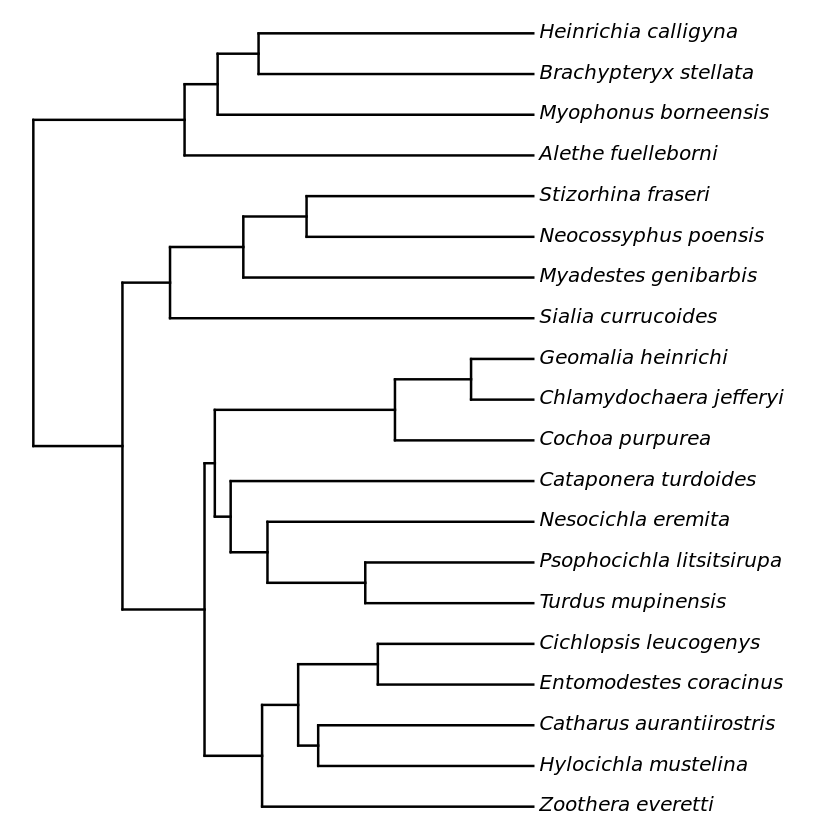

In [31]:
# Combine the columns and add back in the underscore so they match the labels in the tree
genera_tips <- paste(bird_genera$Genus, bird_genera$Species, sep="_")

# Pull out the tips we want to drop
drop.tips <- setdiff(Ran_Turdidae_tree$tip.label, genera_tips)

# Remove all the species except one per genus
genera_tree<-drop.tip(Ran_Turdidae_tree, drop.tips)
plotTree(genera_tree,ftype="i")

As its dropped all but one species per genus, this means we will finally need to also rename the tip labels as well to reflect this change.


In [ ]:
# This will split the tip.labels into genus and species again, and then iterate through them taking only the first half.
# This keeps the tip.labels in the same order as they are in the tree.
genera_tree$tip.label<-sapply(strsplit(genera_tree$tip.label,"_"), function(x) x[1])
plotTree(genera_tree,ftype="i")
                              
test_tree <- genera_tree 
test_tree$tip.label <- bird_genera$Genus
plotTree(test_tree, ftype="i")

It is important to note, that a big limitation with this approach is that by selecting only one species per genus to keep, that you may run the risk of unintentially dropping tips of species that are paraphyletic. For example, Zoothera genus is spread throughout Turdidae tree.

In [ ]:
plotTree(Ran_Turdidae_tree,fsize=0.2,lwd=0.2,ftype="i")
zoom(Ran_Turdidae_tree,10:40,subtree = T,no.margin=T)

This means that when collapsing a phylogenetic tree you run the risk of miss representing the relationship between the different genera. The only way to get round this is by:

a) making sure check to see how paraphyletic your tree is at the start; this can be done more easily by uploading and viewing your tree file @ https://itol.embl.de/. 
b) Renaming your conflicting paraphyletic clades within your phylogeny, by altering the individual species names.


In [ ]:
Ran_Turdidae_tree$tip.label[Ran_Turdidae_tree$tip.label=="Turdus_philomelos"]<-"Turdus1_philomelos"

## 6. Adding trait data to trees in `R`
### A. Ancestral state reconstructions on discrete data
For this exercise we will use the bird data.
Remember we already loaded the phylogeny and data as follows:

In [ ]:
data(bird.orders)

First we will invent some data for each bird order that we can reconstruct along the tree.
Lets pretend we went in the field and studied each taxa's dietary preferences and found out that they can be sorted into three categories: herbivores, omnivores and carnivores.

In [ ]:
diets <- c(rep("Herbivore", 5), "Omnivore", rep("Carnivore", 4), rep("Omnivore", 5),
    rep("Herbivore", 2), rep("Omnivore", 3), rep("Carnivore", 2), "Omnivore")

The function `rep` simply repeats the dietary name *n* times.
Here we assigned the dietary category to each bird group in the order they appear in the phylogeny.
You can then check your information by using the function `paste` that will simply paste together the birds orders and their diet:

In [ ]:
paste(bird.orders$tip.label, "-", diets)

We can then use the `ape` function `ace` to reconstruct ancestral characters along the nodes of the tree. 
`type = d` means the character to be reconstructed is discrete.

In [ ]:
ancestors <- ace(diets, bird.orders, type = "d")

`ace` uses a likelihood function to estimate what is the probability of each node to be one of the three dietary categories.
You can find more information on how `ace` works by looking at its manual page (`?ape`) or you can look at the results:

In [ ]:
ancestors

This gives use information on:

* the rate index matrix (i.e. the probability of changing from one dietary category to another - here every probability are as likely)
* the parameter estimates (i.e. the rate - or speed - at which changes in diet can occur along the branches)
* the scaled likelihood at the root (i.e. the likelihood of the ancestor of all birds to be of one dietary category or the other)

For more clarity, we can plot all this on a phylogeny.
First decide which colours we'd like.
To look at a list of colours in `R` type in `colors()`.

In [ ]:
colours <- c("cornflowerblue", "cyan4", "goldenrod")

Now plot the tree and add labels to the tips and the nodes using the results in `ancestors`. 
We use `label.offset = 1` to move the labels to the right a bit so the pie charts will fit.

In [ ]:
plot(bird.orders, label.offset = 1)
tiplabels(pch = 21, bg = colours[as.factor(diets)], cex = 2, adj = 1)
nodelabels(pie = ancestors$lik.anc, piecol = colours)

`pch = 21` sets the tip labels to be unfilled circles, `bg` defines the colours of the circles using the list of colours we provided, and ordering them based on what the species value was for mydata (i.e. 0, 1 or 2).
`cex = 2` doubles the point size, and `adj = 1` moves the tip labels sideways so they don't obscure the ends of the branches.
`pie` makes pie charts coloured using the ancestral state reconstructions in `ancestors`, and `piecol` tells it to use the colours we have defined.

> Again, try to change the graphical parameters to obtain the ugliest or most beautiful figure that tells us about the evolution of diet in birds.

> Can you tell what is the most likely diet of the ancestor of these birds? Also what is the rate of change in diet in birds per unit of time?

### B. Ancestral state reconstructions on continuous data
Similarly to discrete categorical data (see above) we can analysis continuous data to estimate the value of this data for the ancestor of a phylogeny.
We are going to use the *Anolis* data to create a phylogeny with different colours for different observed and reconstructed body sizes (snout-to-vent length, SVL). 
Remember we already loaded the phylogeny and data as follows:

In [ ]:
data(anoletree)
anoledata <- read.csv("anole.data.csv", header = TRUE, row.names = 1) 

Note the names in `anoledata` are the species names without the Genus. 
In the phylogeny the species names are `Anolis_species`. 
So to get the two to match we need to add `Anolis_` to each name.

In [ ]:
rownames(anoledata) <- paste("Anolis", rownames(anoledata), sep = "_")

As seen before, `paste` just sticks together `Anolis` with the names in `anoles` already with an underscore (`_`) separating them (`sep = "_"`).
We then need to make sure the order of the species in the data matches that of the phylogeny.

In [ ]:
anoledata <- anoledata[anoletree$tip.label, ]

Next we make a matrix containing only the average snout-to-vent length values for each *Anolis* species:

In [ ]:
SVL <- as.matrix(anoledata)[,"AVG.SVL"]

This code selects only the variable `AVG.SVL` from `anoledata` (square brackets subset in `R` in the form [rows, columns]), and then uses `as.matrix` to make this data frame into a matrix.

Take a look at the first values in `SVL`:


In [ ]:
head(SVL)

We can use the `ace` function as before but by changing the data, the tree and the method (`c` for continuous):

In [ ]:
SVLancestors <- ace(SVL, anoletree, type = "c")

The estimation uses a similar Maximum Likelihood function as before but now gives us:

* the estimated value for each node (use `SVLancestors$ace` to display it)
* the 95% confidence intervals for each estimate value (use `SVLancestors$CI95` to display it)
* the sigma<sup>2</sup> value that is the parameter estimation from the evolutionary model used (by default a Brownian motion model; google it, it's fun!)

To visualise this data, we will us the function `contMap` from the `phytools` package. 
`contMap` creates a tree with a mapped continuous character, i.e. where the value of the character is known at the tips, and estimated along the tree. 
The estimating of the character along the tree also uses a Maximum Likelihood estimation procedure similar to `ace`.
Here we will tell `contMap` not to automatically plot the tree (using `plot = FALSE`) so we can make some modifications.

In [ ]:
SVLplot <- contMap(anoletree, SVL, plot = FALSE)

Finally let's plot the tree as a fan (`legend = 5` just spreads the legend out so it is readable).

In [ ]:
plot(SVLplot, type = "fan", legend = 5)

What is the estimated snout-to-ventral length for the ancestor of *Anolis* lizards? What is the confidence around this estimation?

> By using the plot, can you spot the clades with small or big lizards? Is there any clade where the size seems to be changing a lot in evolutionary time?
